In [173]:
import pandas as pd
import numpy as np 

In [174]:
#Leyendo la base de datos
base=pd.read_csv('C:/Users/edihc/Documents/GitHub/proyecto-portafolio_edith/datos/bicimad.csv')

In [175]:
base

,Unnamed: 0,tfl_id,bikes,spaces,timestamp
0,93740,31,9,15,06/02/2017 12:16
1,98969,85,15,12,06/02/2017 12:16
2,36499,89,11,13,06/02/2017 12:20
3,4567,146,13,10,06/02/2017 12:40
4,19132,94,10,13,06/02/2017 12:40
...,...,...,...,...,...
99995,47631,4,15,3,21/03/2018 03:34
99996,37032,9,6,18,21/03/2018 03:40
99997,35649,143,10,14,21/03/2018 03:44
99998,81215,168,17,7,21/03/2018 03:56


In [176]:
base_df = base.drop(['Unnamed: 0'], axis=1)

In [177]:
base_df.head()

,tfl_id,bikes,spaces,timestamp
0,31,9,15,06/02/2017 12:16
1,85,15,12,06/02/2017 12:16
2,89,11,13,06/02/2017 12:20
3,146,13,10,06/02/2017 12:40
4,94,10,13,06/02/2017 12:40


In [178]:
#corregir nombres de variables
import seaborn as sb
base_df = base_df.rename(columns={'bikes':'puestos_disponibles',
                                   'spaces':'puestos_vacios'})
base_df

,tfl_id,puestos_disponibles,puestos_vacios,timestamp
0,31,9,15,06/02/2017 12:16
1,85,15,12,06/02/2017 12:16
2,89,11,13,06/02/2017 12:20
3,146,13,10,06/02/2017 12:40
4,94,10,13,06/02/2017 12:40
...,...,...,...,...
99995,4,15,3,21/03/2018 03:34
99996,9,6,18,21/03/2018 03:40
99997,143,10,14,21/03/2018 03:44
99998,168,17,7,21/03/2018 03:56


In [179]:
#ver el máximo de espacios disponibles
base_df[base_df['puestos_disponibles'] == base_df['puestos_disponibles'].max()]






,tfl_id,puestos_disponibles,puestos_vacios,timestamp
91697,95,30,0,13/02/2018 09:56


In [180]:
#ver el máximo de espacios vacios
base_df[base_df['puestos_vacios']==base_df['puestos_vacios'].max()]

,tfl_id,puestos_disponibles,puestos_vacios,timestamp
85422,95,0,30,19/01/2018 15:08


In [181]:
#averiguar el promedio por estación
base_df.groupby('tfl_id').mean()

,puestos_disponibles,puestos_vacios
tfl_id,,
1,9.626891,12.026891
2,9.920810,12.662983
3,6.683363,16.080501
4,7.868376,8.444444
5,6.003413,16.610922
...,...,...
171,10.258224,12.319079
172,10.642373,12.191525
173,10.412266,12.870528


In [198]:
base_df.groupby(['tfl_id', 'timestamp']).mean()

puestos_disponibles  puestos_vacios
tfl_id timestamp                                            
1      01/02/2018 15:40                   16               7
       01/03/2017 14:22                   10              13
       01/03/2018 22:28                    8              16
       01/05/2017 09:40                    7              16
       01/06/2017 16:04                    4              16
...                                      ...             ...
175    31/08/2017 19:04                   11              11
       31/08/2017 22:52                   20               2
       31/10/2017 05:08                   12              12
       31/12/2017 00:14                   20               2
       31/12/2017 17:26                    2              22

[100000 rows x 2 columns]

In [199]:
# ordenar por espacios disponibles de forma ascendente: de menor a mayor
base_df.sort_values(by=['puestos_disponibles'], ascending=False).reset_index(drop=True)

,tfl_id,puestos_disponibles,puestos_vacios
0,95,30,0
1,95,29,1
2,43,27,0
3,43,27,0
4,43,27,0
...,...,...,...
99995,165,0,9
99996,100,0,24
99997,37,0,24
99998,23,0,0


In [201]:
import matplotlib.pyplot as plt

In [203]:
estaciones_df = base_df.groupby('tfl_id').count().reset_index()
estaciones_df

,tfl_id,puestos_disponibles,puestos_vacios
0,1,595,595
1,2,543,543
2,3,559,559
3,4,585,585
4,5,586,586
...,...,...,...
168,171,608,608
169,172,590,590
170,173,587,587
171,174,630,630


In [205]:
# conteo por estación y puestos
cont_est_pu = base_df.groupby(['tfl_id',]).count().reset_index()

cont_est_pu.head()

,tfl_id,puestos_disponibles,puestos_vacios
0,1,595,595
1,2,543,543
2,3,559,559
3,4,585,585
4,5,586,586


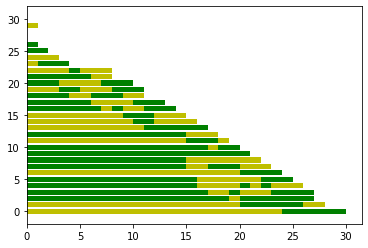

In [226]:
import numpy as np

tfl_id_sort=base_df.sort_values('puestos_disponibles', ascending=False)
plt.barh(tfl_id_sort['puestos_disponibles'], tfl_id_sort['puestos_vacios'],
       color=['g', 'y'])
plt.show()